In [1]:
import numpy as np 
from sklearn import preprocessing
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split



In [1]:
import matplotlib.pylab as pllt
import seaborn as sns
pllt.style.use('ggplot')

### Exploratory Data Analysis (EDA)

In [3]:
df_1 = pd.read_csv('Covid_Vaccination2s.csv')
df_1.describe()
#df_1.head()

,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,3.894500e+04,3.865200e+04,38652.000000,38945.000000,4.462500e+04,44625.000000,42904.000000,42311.000000,9.374000e+03,8.744000e+03,...,77046.000000,52449.000000,77634.000000,78779.000000,60828.000000,59931.000000,39007.000000,70847.000000,80833.000000,77517.000000
mean,4.401999e+04,5.963484e+06,227.476052,1.937240,4.141631e+04,1.775553,0.088971,159.455343,1.448260e+07,8.974136e+06,...,19138.882312,13.348729,257.783338,7.820936,10.520272,32.656970,50.916220,3.029584,73.165416,0.727123
std,2.280829e+05,2.702657e+07,495.353769,15.289039,1.484500e+05,4.810457,0.097594,864.928764,6.637651e+07,3.793750e+07,...,19821.321091,19.942984,118.765619,3.977056,10.402965,13.475297,31.763233,2.463559,7.549526,0.150057
min,-2.391720e+05,0.000000e+00,0.000000,-23.010000,0.000000e+00,0.000000,0.000000,1.300000,0.000000e+00,0.000000e+00,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,1.433000e+03,1.246390e+05,11.192750,0.124000,1.467000e+03,0.123000,0.016000,7.700000,6.206025e+04,5.225850e+04,...,4466.507000,0.500000,167.295000,5.290000,1.900000,21.600000,20.859000,1.300000,67.920000,0.602000
50%,5.446000e+03,6.207335e+05,55.466000,0.550000,5.620000e+03,0.559000,0.053000,18.200000,4.803760e+05,3.548135e+05,...,12951.839000,2.200000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.530000,0.748000
75%,2.157900e+04,2.582847e+06,224.889750,1.773000,2.357700e+04,1.834000,0.128000,57.200000,2.997519e+06,2.108087e+06,...,27216.445000,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,3.861000,78.730000,0.848000
max,3.202280e+07,4.135027e+08,6233.953000,2827.217000,4.594014e+06,405.595000,0.742000,44258.700000,1.134333e+09,5.952349e+08,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.957000


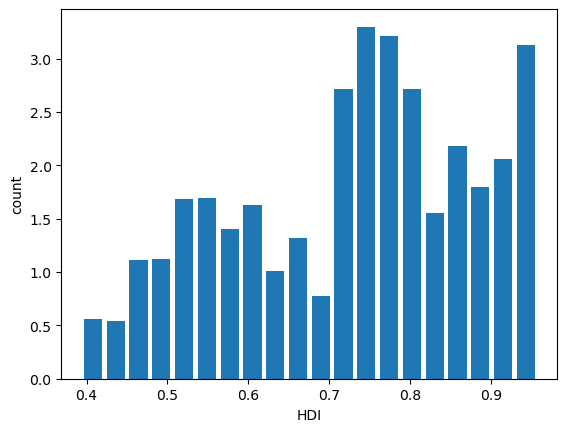

In [16]:
plt.hist(df_1.human_development_index, bins = 20, rwidth = 0.8, density = True)
plt.xlabel('HDI')
plt.ylabel('count')
plt.show()

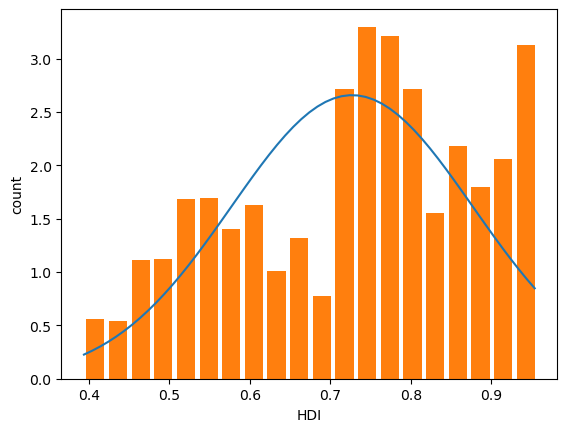

In [19]:
from scipy.stats import norm


rng=np.arange(df_1.human_development_index.min(),df_1.human_development_index.max(), 0.01)
plt.plot(rng,norm.pdf(rng,df_1.human_development_index.mean(),df_1.human_development_index.std()))
plt.hist(df_1.human_development_index, bins = 20, rwidth = 0.8, density = True)
plt.xlabel('HDI')
plt.ylabel('count')
plt.show()

#### Normalizing and Standardizing the Data

In [3]:
df_econ = df_1[['continent','location','gdp_per_capita','extreme_poverty','life_expectancy','human_development_index']]
numerics = ['gdp_per_capita','extreme_poverty','life_expectancy','human_development_index']

std_scale = StandardScaler()
df_1[numerics] = std_scale.fit_transform(df_econ[numerics])

df_1[numerics]

,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index
0,-0.874564,NaN,-1.104105,-1.440288
1,-0.874564,NaN,-1.104105,-1.440288
2,-0.874564,NaN,-1.104105,-1.440288
3,-0.874564,NaN,-1.104105,-1.440288
4,-0.874564,NaN,-1.104105,-1.440288
...,...,...,...,...
85166,-0.869731,0.403718,-1.546519,-1.040436
85167,-0.869731,0.403718,-1.546519,-1.040436
85168,-0.869731,0.403718,-1.546519,-1.040436
85169,-0.869731,0.403718,-1.546519,-1.040436


In [4]:
std_scaler = MinMaxScaler()
df_econ[numerics] = std_scaler.fit_transform(df_econ[numerics])

df=df_econ[numerics]
df_econ

C:\Users\JOB\AppData\Local\Temp\ipykernel_3880\3784700532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_econ[numerics] = std_scaler.fit_transform(df_econ[numerics])


,continent,location,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index
0,Asia,Afghanistan,0.009828,NaN,0.345085,0.207815
1,Asia,Afghanistan,0.009828,NaN,0.345085,0.207815
2,Asia,Afghanistan,0.009828,NaN,0.345085,0.207815
3,Asia,Afghanistan,0.009828,NaN,0.345085,0.207815
4,Asia,Afghanistan,0.009828,NaN,0.345085,0.207815
...,...,...,...,...,...,...
85166,Africa,Zimbabwe,0.010652,0.274839,0.245294,0.314387
85167,Africa,Zimbabwe,0.010652,0.274839,0.245294,0.314387
85168,Africa,Zimbabwe,0.010652,0.274839,0.245294,0.314387
85169,Africa,Zimbabwe,0.010652,0.274839,0.245294,0.314387


#### Filtering Outliers

In [5]:
mean = df.mean()
dev = df.std()
threshold = 3
z_score = np.abs(df-mean)/dev
#Finding Outlier indices
outlier_indices =np.where(z_score>threshold)[0]

#Filtering Outliers
df_filt = df_econ.drop(df.index[outlier_indices])
df_filt

,continent,location,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index
0,Asia,Afghanistan,0.009828,NaN,0.345085,0.207815
1,Asia,Afghanistan,0.009828,NaN,0.345085,0.207815
2,Asia,Afghanistan,0.009828,NaN,0.345085,0.207815
3,Asia,Afghanistan,0.009828,NaN,0.345085,0.207815
4,Asia,Afghanistan,0.009828,NaN,0.345085,0.207815
...,...,...,...,...,...,...
85166,Africa,Zimbabwe,0.010652,0.274839,0.245294,0.314387
85167,Africa,Zimbabwe,0.010652,0.274839,0.245294,0.314387
85168,Africa,Zimbabwe,0.010652,0.274839,0.245294,0.314387
85169,Africa,Zimbabwe,0.010652,0.274839,0.245294,0.314387


### Univariate Analysis

<Figure size 2500x1800 with 0 Axes>

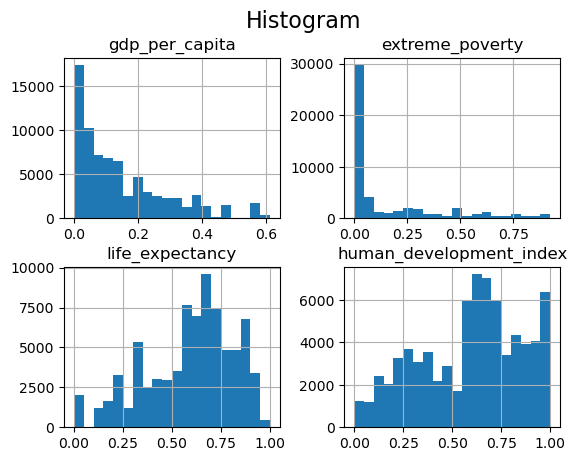

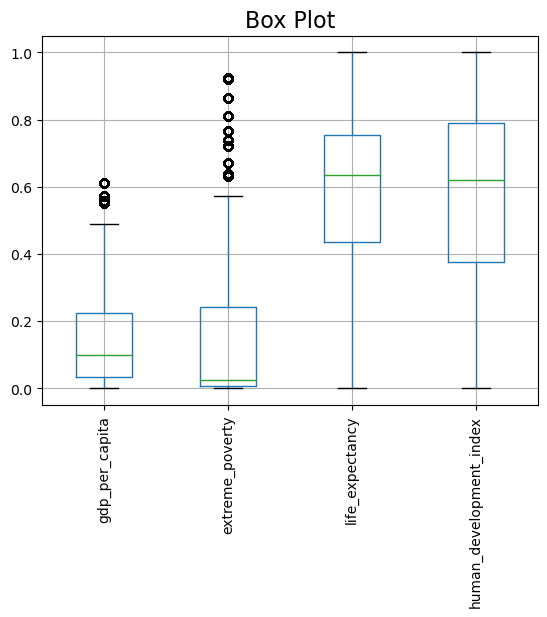

In [6]:
# Set the size of the plot 
plt.figure(figsize=(25, 18))

# plot histogram
df_filt.hist(bins = 20)                            
 
# use suptitle to add title to all sublots 
plt.suptitle("Histogram", fontsize=16) 
plt.show()

# plot boxplot 
# Create the boxplot
df_filt.boxplot()

# Set the labels to be written vertically
plt.xticks(rotation='vertical')

# Set the title
plt.title("Box Plot", fontsize=16)

# Display the plot
plt.show()

### Multivariate Analysis

Normalized Mean Values by Continent:
       continent  gdp_per_capita  extreme_poverty  life_expectancy  \
0         Africa        0.043171         0.404938         0.328011   
1           Asia        0.156926         0.071306         0.625940   
2         Europe        0.270146         0.010632         0.789929   
3  North America        0.151996         0.070335         0.670217   
4        Oceania        0.142417         0.089485         0.610958   
5  South America        0.113909         0.035304         0.656141   

   human_development_index  
0                 0.302639  
1                 0.600085  
2                 0.862963  
3                 0.646376  
4                 0.629395  
5                 0.658528  


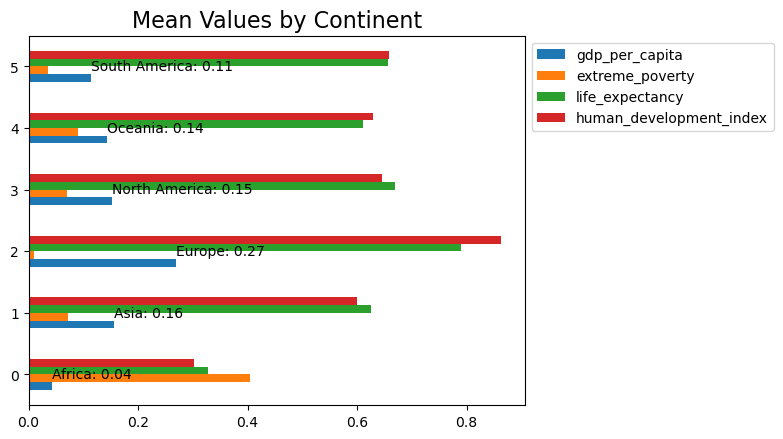

In [7]:
import matplotlib.pyplot as plt

DF = df_filt[['gdp_per_capita', 'extreme_poverty', 'life_expectancy', 'human_development_index']].groupby(df_filt['continent']).mean().reset_index()
print('Normalized Mean Values by Continent:')
print(DF)
fig, ax = plt.subplots()

# Create the horizontal bar plot
DF.plot(kind='barh', ax=ax)

# Set the titles for each subplot
for i, (index, row) in enumerate(DF.iterrows()):
    ax.text(row.gdp_per_capita, i, f"{row.continent}: {row.gdp_per_capita:.2f}", ha='left', va='center')

# Set the title for the figure
plt.title("Mean Values by Continent", fontsize=16)
plt.legend(loc="upper left", bbox_to_anchor=(1,1)) 
# Display the plot
plt.show()


                         gdp_per_capita  extreme_poverty  life_expectancy  \
gdp_per_capita                 1.000000        -0.761797         0.890130   
extreme_poverty               -0.761797         1.000000        -0.963449   
life_expectancy                0.890130        -0.963449         1.000000   
human_development_index        0.925409        -0.923154         0.985750   

                         human_development_index  
gdp_per_capita                          0.925409  
extreme_poverty                        -0.923154  
life_expectancy                         0.985750  
human_development_index                 1.000000  


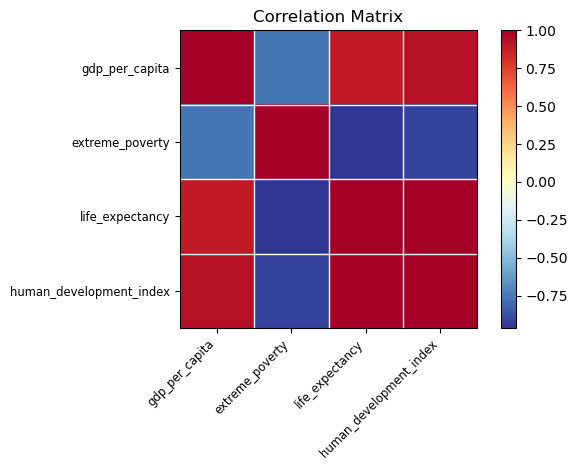

In [8]:
# create correlation matrix 
corr = DF.corr() 
print(corr)
import statsmodels.api as sm 
sm.graphics.plot_corr(corr, xnames=list(corr.columns)) 
plt.show() 

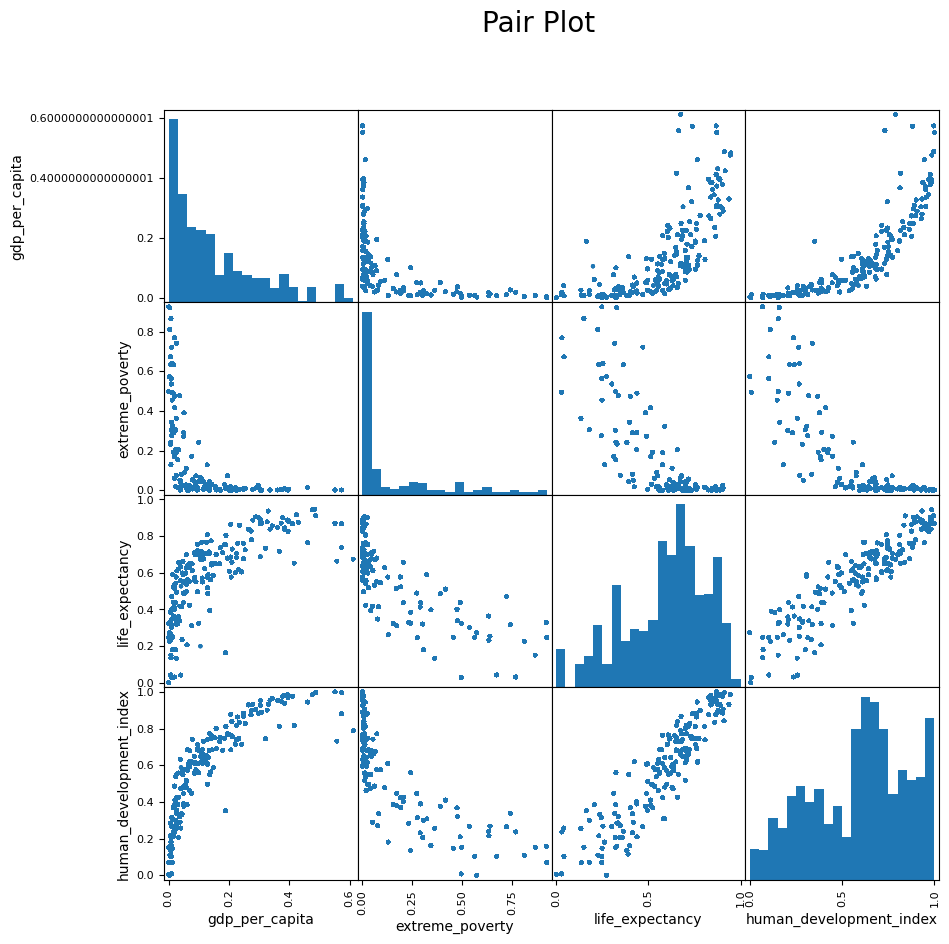

In [9]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(df_filt, figsize=(10, 10), hist_kwds={'bins': 20})

# Use suptitle to add a title to all subplots
plt.suptitle("Pair Plot", fontsize=20)

# Display the plot
plt.show()


## Supervised Learning

#### Regression

In [10]:
df_filt

,continent,location,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index
0,Asia,Afghanistan,0.009828,NaN,0.345085,0.207815
1,Asia,Afghanistan,0.009828,NaN,0.345085,0.207815
2,Asia,Afghanistan,0.009828,NaN,0.345085,0.207815
3,Asia,Afghanistan,0.009828,NaN,0.345085,0.207815
4,Asia,Afghanistan,0.009828,NaN,0.345085,0.207815
...,...,...,...,...,...,...
85166,Africa,Zimbabwe,0.010652,0.274839,0.245294,0.314387
85167,Africa,Zimbabwe,0.010652,0.274839,0.245294,0.314387
85168,Africa,Zimbabwe,0.010652,0.274839,0.245294,0.314387
85169,Africa,Zimbabwe,0.010652,0.274839,0.245294,0.314387


In [13]:
df_filt.isna().sum()

continent                   4111
location                       0
gdp_per_capita              8125
extreme_poverty            31750
life_expectancy             4338
human_development_index     7573
dtype: int64

In [16]:
df_1=df_filt.dropna()
df_1

,continent,location,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index
875,Europe,Albania,0.095827,0.012903,0.755602,0.712256
876,Europe,Albania,0.095827,0.012903,0.755602,0.712256
877,Europe,Albania,0.095827,0.012903,0.755602,0.712256
878,Europe,Albania,0.095827,0.012903,0.755602,0.712256
879,Europe,Albania,0.095827,0.012903,0.755602,0.712256
...,...,...,...,...,...,...
85166,Africa,Zimbabwe,0.010652,0.274839,0.245294,0.314387
85167,Africa,Zimbabwe,0.010652,0.274839,0.245294,0.314387
85168,Africa,Zimbabwe,0.010652,0.274839,0.245294,0.314387
85169,Africa,Zimbabwe,0.010652,0.274839,0.245294,0.314387


In [17]:
df_1.describe()

,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index
count,50316.000000,50316.000000,50316.000000,50316.000000
mean,0.126140,0.160650,0.573561,0.570134
std,0.127338,0.239329,0.216801,0.266152
min,0.000352,0.000000,0.028682,0.000000
25%,0.023498,0.005161,0.400956,0.337478
50%,0.085321,0.024516,0.621452,0.614565
75%,0.194815,0.242581,0.717359,0.765542
max,0.573420,0.923871,0.904691,1.000000


In [19]:
gdp = df_1['gdp_per_capita']
expectancy = df_1['life_expectancy']
poverty = df_1['extreme_poverty']
hdi = df_1['human_development_index']

Text(0, 0.5, 'Life Expectancy')

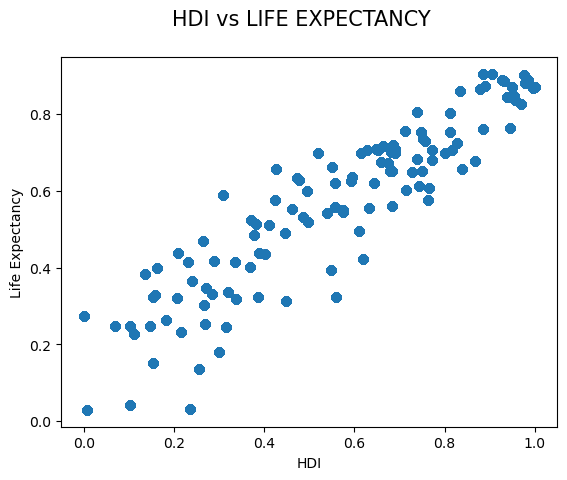

In [47]:
plt.scatter(hdi,expectancy)
plt.suptitle("HDI vs LIFE EXPECTANCY", fontsize=15)
plt.xlabel('HDI')
plt.ylabel('Life Expectancy')

In [30]:
HDI = df_1[['human_development_index']]
expectancy = df_1[['life_expectancy']]
HDI_train, HDI_test, expectancy_train, expectancy_test = train_test_split(HDI,expectancy, test_size = 0.2, random_state = 45)

In [33]:
lr = lm.LinearRegression()
lr.fit(HDI_train,expectancy_train)
print("Intercept: ", lr.intercept_ )
print("Coefficient: ", lr.coef_)


Intercept:  [0.1503533]
Coefficient:  [[0.74199081]]


In [35]:
Expectancy_predict = lr.predict(HDI_test)
Expectancy_predict

array([[0.56286329],
       [0.55890952],
       [0.155625  ],
       ...,
       [0.81063287],
       [0.56549914],
       [0.36122103]])

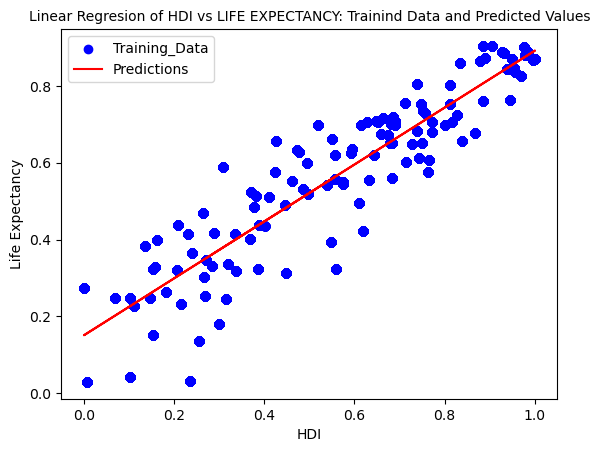

In [80]:
plt.scatter(HDI_train,expectancy_train, color = 'blue',label = 'Training_Data')
plt.plot(HDI_test, Expectancy_predict, color = 'red', label = 'Predictions')
plt.xlabel('HDI')
plt.ylabel('Life Expectancy')
plt.title("Linear Regresion of HDI vs LIFE EXPECTANCY: Trainind Data and Predicted Values", fontsize=10)
plt.legend()

In [54]:
from sklearn.preprocessing import PolynomialFeatures


In [74]:
Hdi = df_1[['human_development_index']].values
Expectancy = df_1[['life_expectancy']].values
deg = 4
poly = PolynomialFeatures(degree = deg)
Hdi_poly = poly.fit_transform(Hdi)
Hdi_train, Hdi_test, Expectancy_train, Expectancy_test = train_test_split(Hdi_poly,Expectancy, test_size = 0.2, random_state = 45)
poly_reg = lm.LinearRegression()
poly_reg.fit(Hdi_train,Expectancy_train)
Exp_pred = poly_reg.predict(Hdi_test)
Exp_pred

array([[0.57420412],
       [0.57037611],
       [0.17299709],
       ...,
       [0.80059432],
       [0.57674466],
       [0.35646   ]])

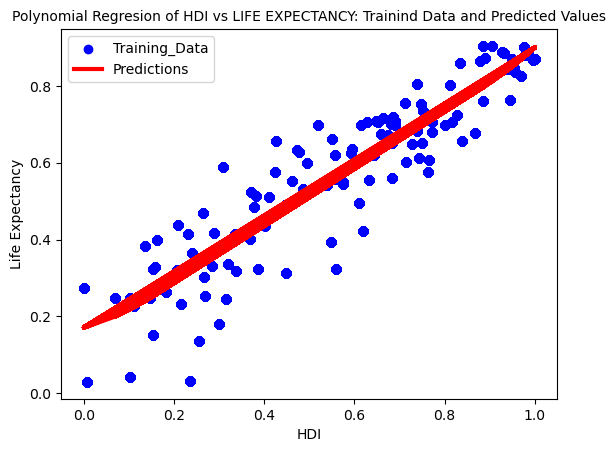

In [79]:
plt.scatter(Hdi_train[:,1],Expectancy_train, color = 'blue',label = 'Training_Data')
plt.plot(Hdi_test[:,1], Exp_pred, color = 'red', label = 'Predictions', linewidth = 3)
plt.xlabel('HDI')
plt.ylabel('Life Expectancy')
plt.title("Polynomial Regresion of HDI vs LIFE EXPECTANCY: Trainind Data and Predicted Values", fontsize=10)
plt.legend()

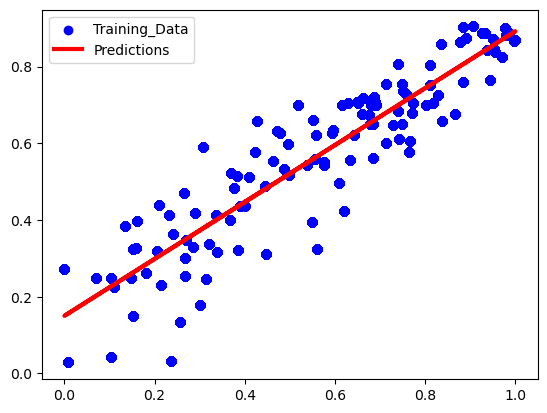

In [72]:
plt.scatter(HDI_train,expectancy_train, color = 'blue',label = 'Training_Data')
plt.plot(HDI_test, lr.predict(HDI_test), color = 'red', label = 'Predictions', linewidth = 3)
plt.legend()